In [1]:
#1. Import libraries
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import keras

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_HVN_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,30274,31432,30274,31278,1231293
1,2019-03-04,31046,33209,31046,33131,2159830
2,2019-03-05,33209,36298,32668,32900,1352465
3,2019-03-06,32050,33054,32050,32745,815962
4,2019-03-07,32591,33054,32359,32436,713115
...,...,...,...,...,...,...
1240,2024-02-23,12650,12750,12500,12550,469600
1241,2024-02-26,12550,12850,12500,12800,627300
1242,2024-02-27,12800,12850,11950,12700,293900
1243,2024-02-28,12900,12900,12650,12650,494700


In [3]:
#3. Scaler data for RNN model
data_rnn=data.reset_index()['close']
scaler=MinMaxScaler(feature_range=(0,1))
data_rnn=scaler.fit_transform(np.array(data_rnn).reshape(-1,1))

In [4]:
#4. Split the data into train and test sets
train_size = int(0.7 * len(data_rnn))
test_size = len(data_rnn) - train_size
train_rnn = data_rnn[:train_size]
test_rnn = data_rnn[train_size:]

In [5]:
#5. Function to create a dataset for RNN model
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 [samples, time steps, features] and Y=t+100 [samples]
time_step = 100
x_train_rnn, y_train_rnn = create_dataset(train_rnn, time_step)
x_test_rnn, y_test_rnn = create_dataset(test_rnn, time_step)
x_train_rnn =x_train_rnn.reshape(x_train_rnn.shape[0],x_train_rnn.shape[1] , 1)
x_test_rnn = x_test_rnn.reshape(x_test_rnn.shape[0],x_test_rnn.shape[1] , 1)

In [7]:
#7. Proceed to define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, return_sequences=True, input_shape=(time_step, 1)))
model_rnn.add(Dropout(0.5))  
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\THAI NGOC DUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#8. Fit model with train data
model_rnn.fit(x_train_rnn,y_train_rnn,validation_data=(x_test_rnn,y_test_rnn),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.6946 - val_loss: 0.0237
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1649 - val_loss: 0.0076
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1116 - val_loss: 0.0115
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0803 - val_loss: 7.5085e-04
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0595 - val_loss: 0.0027
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0489 - val_loss: 0.0028
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0454 - val_loss: 0.0066
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0411 - val_loss: 0.0012
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0284 - val_loss: 0.0025
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0267 - val_loss: 8.8764e-04
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0249 - val_loss: 0.0015
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - l

In [9]:
#9. Predict on the test data, then perform data normalization
pred_test_rnn=model_rnn.predict(x_test_rnn)
pred_test_rnn=scaler.inverse_transform(pred_test_rnn)
check_pred_test_rnn=scaler.inverse_transform(test_rnn)[(time_step+1):]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [10]:
#10. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(pred_test_rnn,check_pred_test_rnn))
mape = mean_absolute_percentage_error(pred_test_rnn,check_pred_test_rnn) * 100
msle = mean_squared_log_error(pred_test_rnn,check_pred_test_rnn)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 461.13497695276226
MAPE: 2.7168528552013824 %
MSLE: 0.0013187796745135092


In [11]:
#11. Predict close prices for the next 30, 60, 90 days
x_input=test_rnn[-(time_step+1):].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=time_step
i=0
while(i<90):
    
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.10672073 0.11628352 0.12202119 0.12202119 0.11819608 0.11819608
 0.12010863 0.11437096 0.1124584  0.0990705  0.09142027 0.0990705
 0.09333282 0.0990705  0.09524538 0.07420724 0.0761198  0.07420724
 0.06081934 0.0627319  0.07994492 0.07420724 0.0761198  0.07420724
 0.08759515 0.09715794 0.09333282 0.08950771 0.08950771 0.08759515
 0.09333282 0.08568259 0.08950771 0.09524538 0.09524538 0.10289561
 0.0990705  0.10289561 0.10480817 0.10480817 0.10098305 0.10098305
 0.10480817 0.10672073 0.10672073 0.10289561 0.10289561 0.08950771
 0.08950771 0.09142027 0.08950771 0.08759515 0.08185748 0.07994492
 0.08377003 0.08759515 0.09142027 0.12010863 0.15070956 0.15262212
 0.14305933 0.13923421 0.13923421 0.1717477  0.16983514 0.15835979
 0.15070956 0.15070956 0.148797   0.15453467 0.148797   0.14497189
 0.148797   0.148797   0.14497189 0.15070956 0.15070956 0.14688444
 0.14497189 0.14497189 0.15070956 0.14688444 0.15070956 0.148797
 0.14688444 0.14114677 0.14114677 0.15262212 0.148797

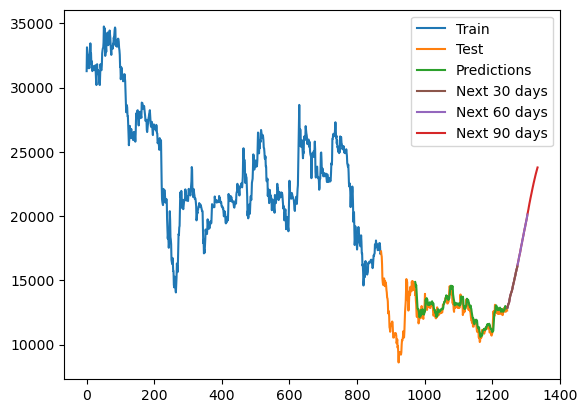

In [12]:
#12. Draw the plot
train_index = pd.RangeIndex(start=0, stop=train_size, step=1)
line1, = plt.plot(train_index, scaler.inverse_transform(train_rnn), label="Train")

test_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
line2, = plt.plot(test_index, scaler.inverse_transform(test_rnn), label="Test")

pred_index = pd.RangeIndex(start=train_size + 101, stop=train_size + test_size, step=1)
line3, = plt.plot(pred_index, pred_test_rnn, label="Predictions")

pred90_index = pd.RangeIndex(start=len(data), stop=len(data) + 90, step=1)
line4, = plt.plot(pred90_index, scaler.inverse_transform(lst_output), label="Next 90 days")

pred60_index = pd.RangeIndex(start=len(data), stop=len(data) + 60, step=1)
line5, = plt.plot(pred60_index, scaler.inverse_transform(lst_output[:60]), label="Next 60 days")

pred30_index = pd.RangeIndex(start=len(data), stop=len(data) + 30, step=1)
line6, = plt.plot(pred30_index, scaler.inverse_transform(lst_output[:30]), label="Next 30 days")

plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\RNN_HVN_73.png")
plt.show()